In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
from sklearn.model_selection import train_test_split

In [5]:
def concat_data():
    script_dir = os.path.dirname(__file__)  # Script directory

    full_path = os.path.join(script_dir, './2007')

    all_folders = glob(full_path+"/*")

    frames = []
    for folder in all_folders:
        all_files = glob(folder + "/*.csv")
        li = []
        for filename in all_files:
            print(filename)
            df = pd.read_csv(filename, index_col=None, header=0)
            li.append(df)

        frame = pd.concat(li, axis=0, ignore_index=True)
        frames.append(frame)
    result = pd.concat(frames)

    result.to_csv(r'combined.csv', index=False)

In [6]:
def load_data():
    data = pd.read_csv("combined.csv", index_col=None, header=0)
    return data

In [7]:
df = load_data()
print(df.head())
print(df.tail())

       Date Ticker TimeBarStart  FirstTradePrice  HighTradePrice  \
0  20070405   ISRG        09:30           125.39          125.39   
1  20070405   ISRG        09:31           124.91          125.05   
2  20070405   ISRG        09:32           124.83          125.11   
3  20070405   ISRG        09:33           124.90          124.90   
4  20070405   ISRG        09:34           124.89          124.90   

   LowTradePrice  LastTradePrice  VolumeWeightPrice  Volume  TotalTrades  
0         125.00          125.00          125.14461    4998           19  
1         124.91          125.05          124.99000     700            4  
2         124.83          124.98          124.94750    2400           23  
3         124.90          124.90          124.90000     300            3  
4         124.84          124.90          124.88111     450            4  
             Date Ticker TimeBarStart  FirstTradePrice  HighTradePrice  \
3652086  20070228   LRCX        16:38            44.66           44

In [8]:
aapl_df = df.loc[df['Ticker'] == 'AAPL']

In [9]:
print(aapl_df.head())

           Date Ticker TimeBarStart  FirstTradePrice  HighTradePrice  \
12124  20070405   AAPL        06:13            94.12           94.54   
12125  20070405   AAPL        08:00            94.35           94.36   
12126  20070405   AAPL        08:01            94.36           94.36   
12127  20070405   AAPL        08:03            94.33           94.33   
12128  20070405   AAPL        08:06            94.30           94.30   

       LowTradePrice  LastTradePrice  VolumeWeightPrice  Volume  TotalTrades  
12124          94.12           94.54           94.26000     300            3  
12125          94.35           94.36           94.35800     500            2  
12126          94.35           94.35           94.35925    1341            3  
12127          94.33           94.33           94.33000     250            1  
12128          94.30           94.30           94.30000     500            1  


In [10]:
print(aapl_df.tail())

             Date Ticker TimeBarStart  FirstTradePrice  HighTradePrice  \
3650999  20070228   AAPL        19:40            84.63           84.63   
3651000  20070228   AAPL        19:47            84.62           84.63   
3651001  20070228   AAPL        19:52            84.63           84.63   
3651002  20070228   AAPL        19:58            84.60           84.60   
3651003  20070228   AAPL        19:59            84.60           84.60   

         LowTradePrice  LastTradePrice  VolumeWeightPrice  Volume  TotalTrades  
3650999          84.63           84.63            84.6300     300            1  
3651000          84.62           84.63            84.6232     735            2  
3651001          84.63           84.63            84.6300     500            1  
3651002          84.60           84.60            84.6000     260            2  
3651003          84.60           84.60            84.6000     300            1  


In [23]:
aapl_df.sort_values('Date')
aapl_df.to_csv(r'aapl.csv', index=False)

In [12]:
test_data = aapl_df.loc[aapl_df['Date'] == 20070705]
train_data = aapl_df.loc[aapl_df['Date'] != 20070705]

In [13]:
print(train_data.iloc[2,:])

Date                 20070405
Ticker                   AAPL
TimeBarStart            08:01
FirstTradePrice         94.36
HighTradePrice          94.36
LowTradePrice           94.35
LastTradePrice          94.35
VolumeWeightPrice     94.3593
Volume                   1341
TotalTrades                 3
Name: 12126, dtype: object


In [14]:
training_set = train_data.iloc[:, 3:4].values
print(training_set)

[[94.12]
 [94.35]
 [94.36]
 ...
 [84.63]
 [84.6 ]
 [84.6 ]]


In [15]:
#Import MinMaxScaler from scikit-learn to scale our dataset into numbers between 0 and 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [16]:
print(training_set_scaled)

[[0.10031426]
 [0.10221634]
 [0.10229904]
 ...
 [0.02183262]
 [0.02158452]
 [0.02158452]]


In [17]:
X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

Using TensorFlow backend.


In [22]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
149822/149822 [==============================] - 458s 3ms/step - loss: 0.0026
Epoch 2/5
149822/149822 [==============================] - 456s 3ms/step - loss: 0.0012
Epoch 3/5
149822/149822 [==============================] - 440s 3ms/step - loss: 0.0010
Epoch 4/5
149822/149822 [==============================] - 473s 3ms/step - loss: 9.4771e-04
Epoch 5/5
149822/149822 [==============================] - 483s 3ms/step - loss: 9.2124e-04


In [24]:
X_test = []
test_data = aapl_df.iloc[:, 3:4].values
test_set_scaled = sc.fit_transform(test_data)
for i in range(60, len(test_data)):
    X_test.append(test_set_scaled[i-60:i, 0])
    
X_test= np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [25]:
predicted_stock_price = model.predict(X_test)

In [26]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
date = ['20070705']*len(predicted_stock_price)

In [ ]:
actual_data = aapl_df.as_matrix(columns=[df['Date'], df['FirstTradePrice']])
print(actual_data)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


ValueError: setting an array element with a sequence.

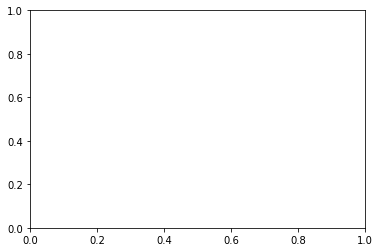

In [60]:
plt.plot([aapl_df.iloc[:,3:4], aapl_df.iloc[:,0]], color = 'black', label = 'AAPL Stock Price')
plt.plot([predicted_stock_price,date], color = 'green', label = 'Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()